# Análise de Dados Agrícolas e Predição de Fertilizantes

Neste notebook, realizaremos uma análise exploratória dos dados agrícolas, visualizações e construção de modelos preditivos para determinar o tipo de cultura baseado nas condições de solo e clima. Além disso, vamos analisar os perfis ideais de solo e clima para diferentes culturas e fertilizantes.

## Bibliotecas Necessárias


In [10]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

## Carregamento dos Dados

Vamos carregar os arquivos CSV que contêm os dados das condições de solo e clima, e os dados sobre fertilizantes.


In [11]:
# Carregando os dados
data = pd.read_csv("C:\\Users\\Rodolpho\\Desktop\\facul\\14\\HTML_Cap_14_fertilizer_prediction.csv")
data_encoded = pd.get_dummies(data, columns=['Soil Type', 'Crop Type', 'Fertilizer Name'], drop_first=True)

fertilizer_data = pd.read_csv("C:\\Users\\Rodolpho\\Desktop\\facul\\14\\HTML_Cap_14_fertilizer_prediction.csv")

# Exibindo as primeiras linhas dos datasets
print(data.head())
print(fertilizer_data.head())
data_encoded.head()


   Temperature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  
   Temperature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7      

,Temperature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,...,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Fertilizer Name_14-35-14,Fertilizer Name_17-17-17,Fertilizer Name_20-20,Fertilizer Name_28-28,Fertilizer Name_DAP,Fertilizer Name_Urea
0,26,52,38,37,0,0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,29,52,45,12,0,36,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,34,65,62,7,9,30,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,32,62,34,22,0,20,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
4,28,54,46,35,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Análise Exploratória Inicial

Agora, vamos realizar uma análise exploratória inicial para entender as características gerais dos dados, como a distribuição das variáveis, a presença de valores ausentes e as estatísticas descritivas.


## Visualizações Iniciais

Vamos gerar gráficos para visualizar as distribuições das variáveis numéricas e entender melhor as características dos dados.


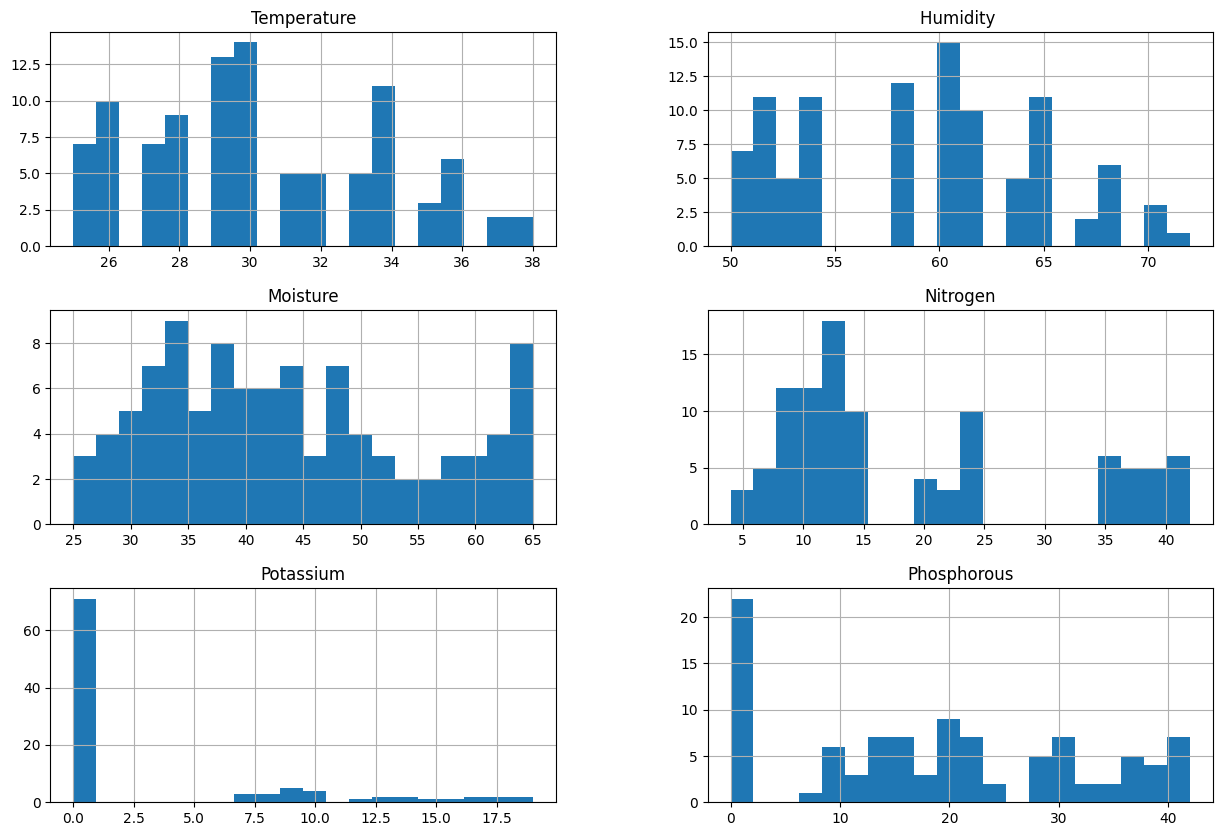

MultiIndex([('Fertilizer Name_14-35-14',       ''),
            (        'Soil Type_Clayey',   'mean'),
            (        'Soil Type_Clayey', 'median'),
            (         'Soil Type_Loamy',   'mean'),
            (         'Soil Type_Loamy', 'median'),
            (           'Soil Type_Red',   'mean'),
            (           'Soil Type_Red', 'median'),
            (         'Soil Type_Sandy',   'mean'),
            (         'Soil Type_Sandy', 'median')],
           )


In [21]:
# Visualizações: histogramas para variáveis numéricas
data.hist(bins=20, figsize=(15, 10))
plt.show()
print(fertilizer_profile.columns)

## Correlação entre as Variáveis

Agora, vamos calcular as correlações entre as variáveis numéricas para entender como as variáveis se relacionam entre si.


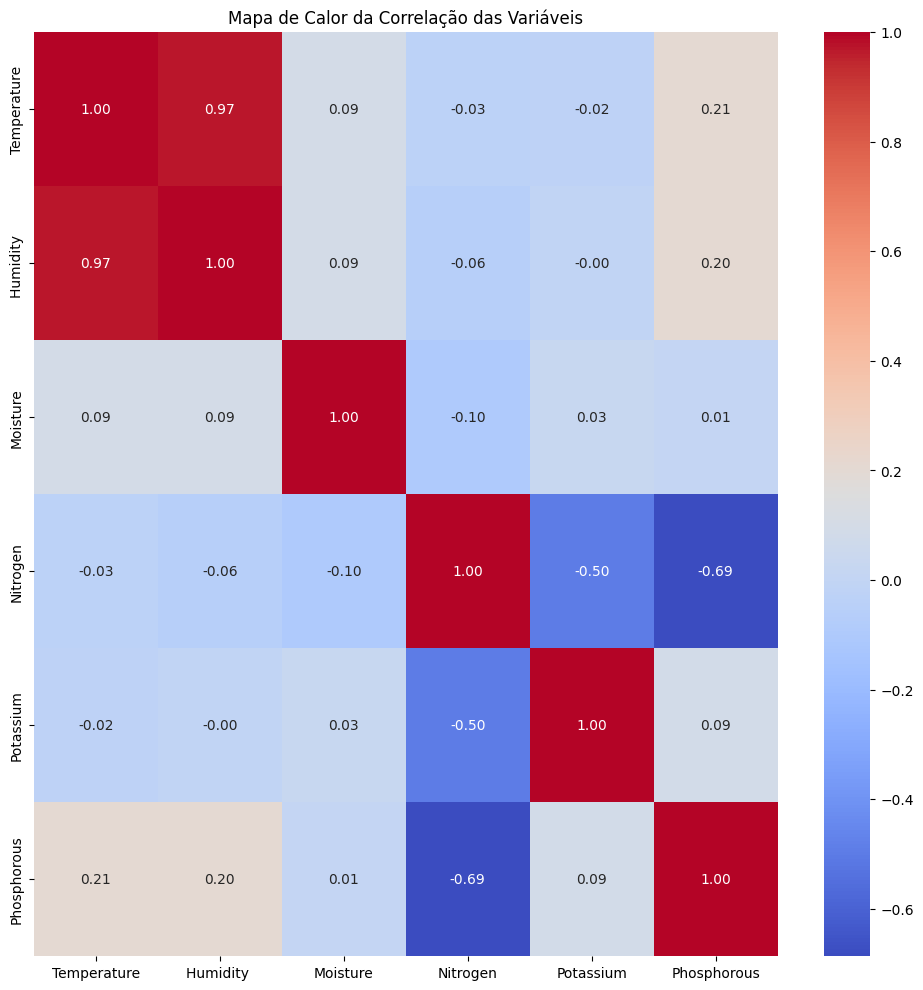

Index(['Temperature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [13]:
# Calculando correlações e gerando mapa de calor
numerical_data = data.select_dtypes(include=[np.number])
corr = numerical_data.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de Calor da Correlação das Variáveis')
plt.show()

## Análise de Perfis de Culturas

Aqui, vamos realizar uma análise de como as diferentes variáveis de solo e clima se comportam em relação às diferentes culturas presentes no dataset. Isso será feito com gráficos de boxplot.


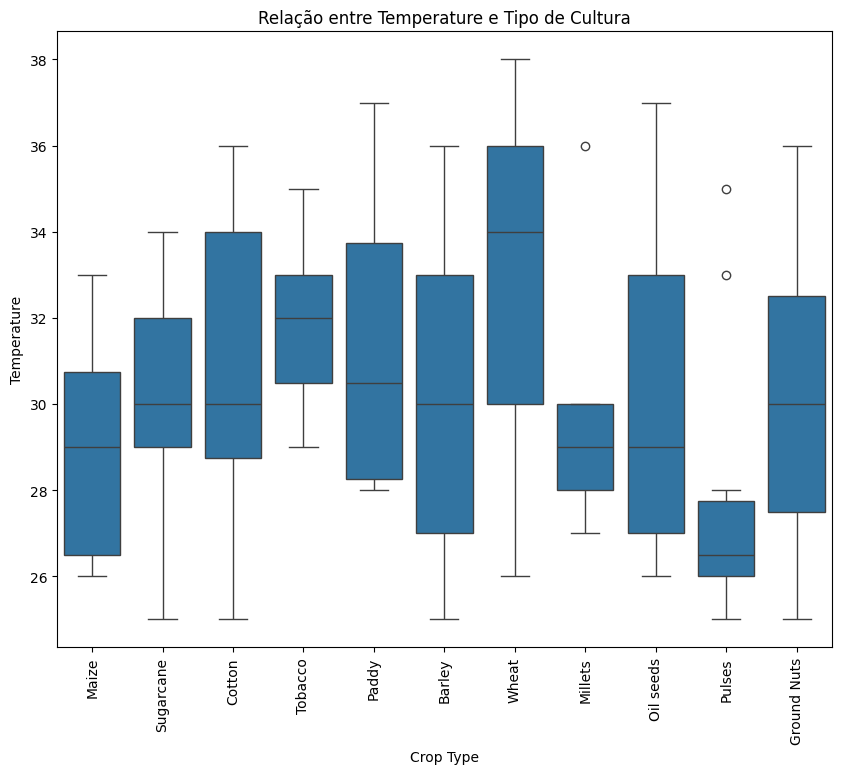

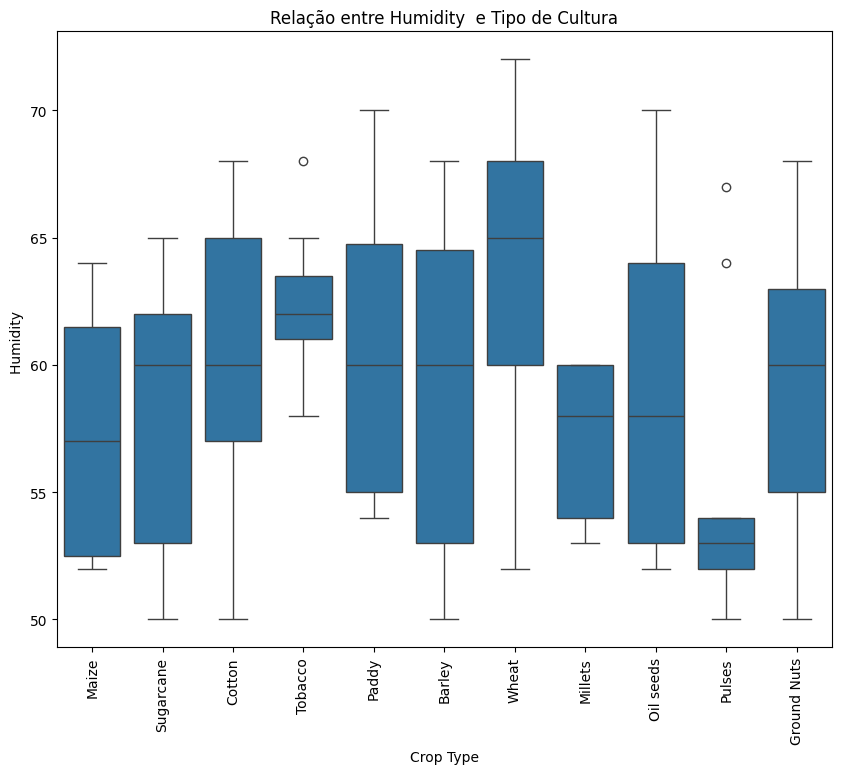

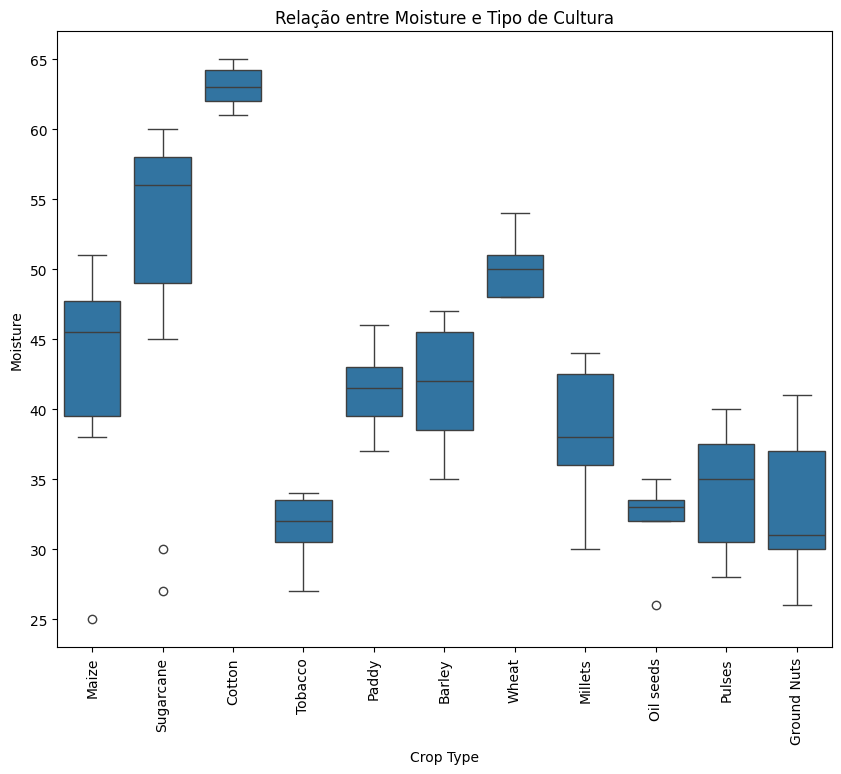

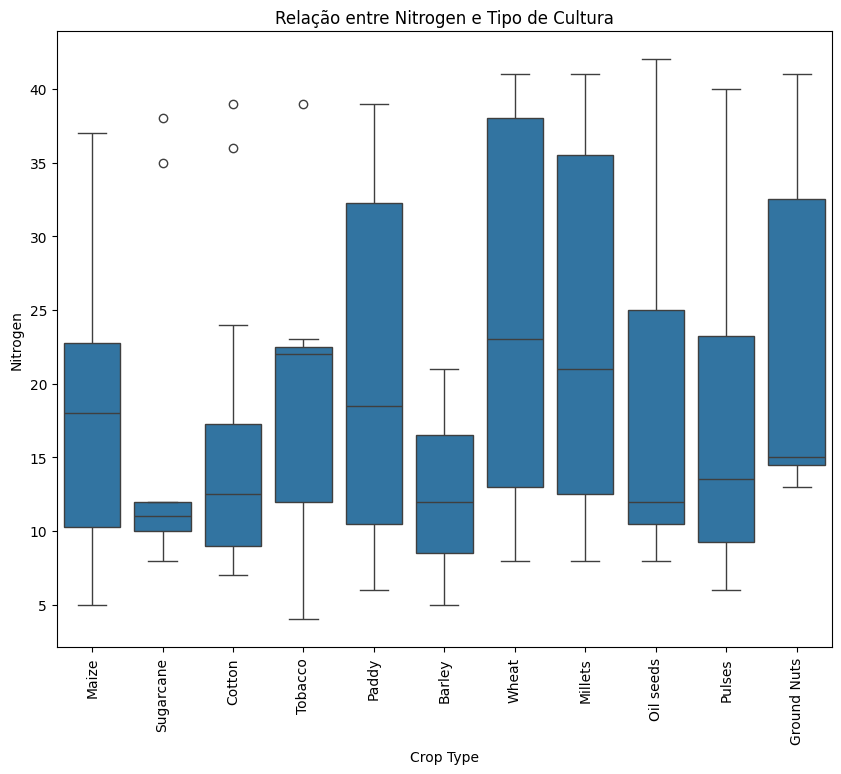

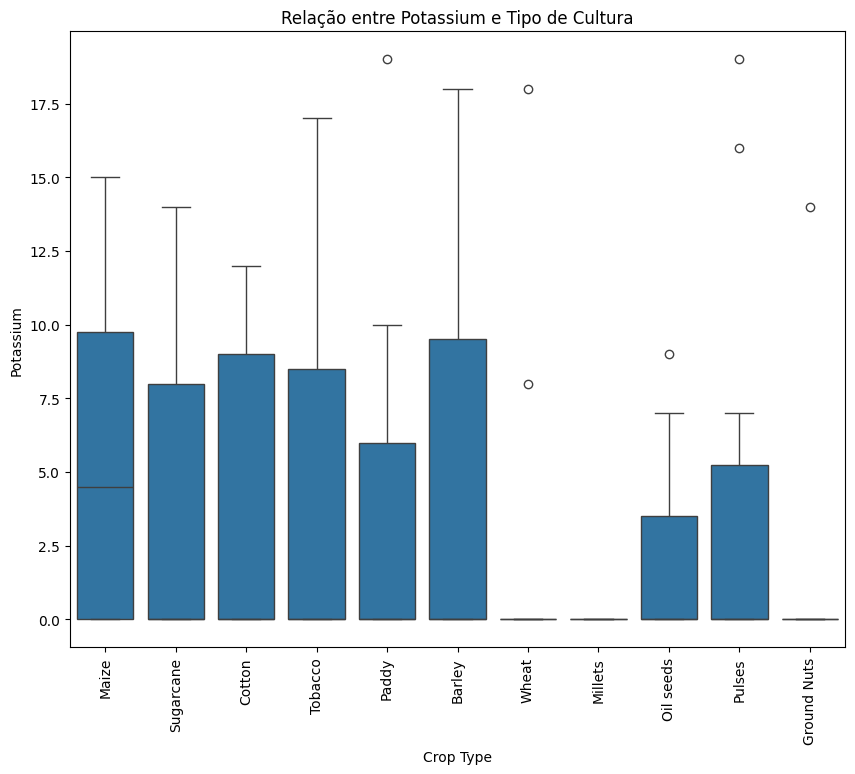

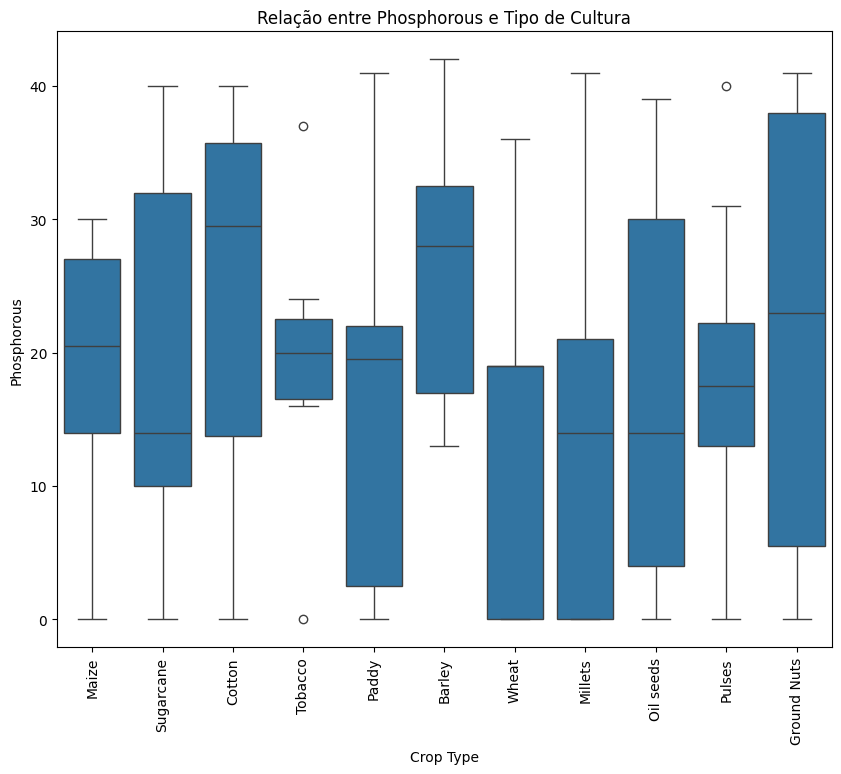

In [14]:
# Boxplots para análise das variáveis por tipo de cultura
for col in ['Temperature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='Crop Type', y=col, data=data)
    plt.title(f'Relação entre {col} e Tipo de Cultura')
    plt.xticks(rotation=90)
    plt.show()

## Perfil Ideal de Solo e Clima para Cada Cultura

Vamos calcular o perfil ideal de solo e clima para cada tipo de cultura, agrupando os dados e calculando as médias e medianas das variáveis.


In [15]:
# Cálculo do perfil ideal de solo e clima para cada cultura
ideal_profile_culture = data.groupby('Crop Type').agg({
    'Nitrogen': ['mean', 'median'],
    'Phosphorous': ['mean', 'median'],
    'Potassium': ['mean', 'median'],
    'Temperature': ['mean', 'median'],
    'Humidity ': ['mean', 'median'],
    'Moisture': ['mean', 'median']
}).reset_index()

print("\nPerfil ideal de solo e clima para cada cultura:")
print(ideal_profile_culture)


Perfil ideal de solo e clima para cada cultura:
      Crop Type   Nitrogen        Phosphorous        Potassium         \
                      mean median        mean median      mean median   
0        Barley  12.571429   12.0   26.000000   28.0  5.285714    0.0   
1        Cotton  16.416667   12.5   23.833333   29.5  3.333333    0.0   
2   Ground Nuts  23.285714   15.0   21.571429   23.0  2.000000    0.0   
3         Maize  18.333333   18.0   18.666667   20.5  5.666667    4.5   
4       Millets  23.181818   21.0   14.363636   14.0  0.000000    0.0   
5     Oil seeds  19.000000   12.0   17.285714   14.0  2.285714    0.0   
6         Paddy  20.800000   18.5   16.300000   19.5  3.700000    0.0   
7        Pulses  18.400000   13.5   17.500000   17.5  4.200000    0.0   
8     Sugarcane  14.615385   11.0   17.615385   14.0  4.230769    0.0   
9       Tobacco  19.142857   22.0   19.285714   20.0  4.857143    0.0   
10        Wheat  23.333333   23.0   14.444444   19.0  2.888889    0.0   

 

## Perfil Ideal para Cada Fertilizante

Agora, vamos calcular o perfil ideal para cada tipo de fertilizante presente no dataset de fertilizantes.


In [16]:
# Agrupar os dados por tipo de fertilizante e calcular as médias das variáveis relevantes
# Vamos considerar as variáveis de solo, clima e nutrientes
fertilizer_profile = data_encoded.groupby('Fertilizer Name_14-35-14').agg({
    'Soil Type_Clayey': ['mean', 'median'],
    'Soil Type_Loamy': ['mean', 'median'],
    'Soil Type_Red': ['mean', 'median'],
    'Soil Type_Sandy': ['mean', 'median'],
}).reset_index()

# Exibindo o perfil ideal para cada fertilizante
print(fertilizer_profile)


  Fertilizer Name_14-35-14 Soil Type_Clayey        Soil Type_Loamy         \
                                       mean median            mean median   
0                    False         0.200000    0.0        0.200000    0.0   
1                     True         0.214286    0.0        0.285714    0.0   

  Soil Type_Red        Soil Type_Sandy         
           mean median            mean median  
0      0.211765    0.0        0.200000    0.0  
1      0.071429    0.0        0.214286    0.0  


## Treinamento e Avaliação dos Modelos

Vamos treinar diferentes modelos de machine learning (KNN, SVM, Decision Tree, Random Forest, Gradient Boosting) e avaliar o desempenho de cada um usando acurácia e o relatório de classificação.


In [20]:
# Modelos de machine learning
X = data_encoded.drop('Soil Type_Loamy', axis=1)  # Substitua 'target_column' pelo nome da sua variável dependente
y = data_encoded['Soil Type_Loamy']  # Variável dependente (target)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelos = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Treinamento e avaliação dos modelos
for nome, modelo in modelos.items():
    print(f"\nTreinando o modelo: {nome}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"Acurácia de {nome}: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))



Treinando o modelo: K-Nearest Neighbors
Acurácia de K-Nearest Neighbors: 0.80
              precision    recall  f1-score   support

       False       0.88      0.88      0.88        17
        True       0.33      0.33      0.33         3

    accuracy                           0.80        20
   macro avg       0.61      0.61      0.61        20
weighted avg       0.80      0.80      0.80        20


Treinando o modelo: Support Vector Machine
Acurácia de Support Vector Machine: 0.85
              precision    recall  f1-score   support

       False       0.85      1.00      0.92        17
        True       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20


Treinando o modelo: Decision Tree
Acurácia de Decision Tree: 0.95
              precision    recall  f1-score   support

       False       0.94      1.00      0.97        17
      

C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [22]:
X = data_encoded.drop('Soil Type_Clayey', axis=1)  # Substitua 'target_column' pelo nome da sua variável dependente
y = data_encoded['Soil Type_Clayey']  # Variável dependente (target)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelos = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Treinamento e avaliação dos modelos
for nome, modelo in modelos.items():
    print(f"\nTreinando o modelo: {nome}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"Acurácia de {nome}: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))



Treinando o modelo: K-Nearest Neighbors
Acurácia de K-Nearest Neighbors: 0.80
              precision    recall  f1-score   support

       False       0.80      1.00      0.89        16
        True       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20


Treinando o modelo: Support Vector Machine
Acurácia de Support Vector Machine: 0.80
              precision    recall  f1-score   support

       False       0.80      1.00      0.89        16
        True       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20


Treinando o modelo: Decision Tree
Acurácia de Decision Tree: 1.00
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        16
      

C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [23]:
X = data_encoded.drop('Soil Type_Red', axis=1)  # Substitua 'target_column' pelo nome da sua variável dependente
y = data_encoded['Soil Type_Red']  # Variável dependente (target)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelos = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Treinamento e avaliação dos modelos
for nome, modelo in modelos.items():
    print(f"\nTreinando o modelo: {nome}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"Acurácia de {nome}: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))



Treinando o modelo: K-Nearest Neighbors
Acurácia de K-Nearest Neighbors: 0.75
              precision    recall  f1-score   support

       False       0.82      0.88      0.85        16
        True       0.33      0.25      0.29         4

    accuracy                           0.75        20
   macro avg       0.58      0.56      0.57        20
weighted avg       0.73      0.75      0.74        20


Treinando o modelo: Support Vector Machine
Acurácia de Support Vector Machine: 0.80
              precision    recall  f1-score   support

       False       0.80      1.00      0.89        16
        True       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20


Treinando o modelo: Decision Tree
Acurácia de Decision Tree: 0.95
              precision    recall  f1-score   support

       False       1.00      0.94      0.97        16
      

C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [24]:
X = data_encoded.drop('Soil Type_Sandy', axis=1)  # Substitua 'target_column' pelo nome da sua variável dependente
y = data_encoded['Soil Type_Sandy']  # Variável dependente (target)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelos = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Treinamento e avaliação dos modelos
for nome, modelo in modelos.items():
    print(f"\nTreinando o modelo: {nome}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"Acurácia de {nome}: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))



Treinando o modelo: K-Nearest Neighbors
Acurácia de K-Nearest Neighbors: 0.70
              precision    recall  f1-score   support

       False       0.74      0.93      0.82        15
        True       0.00      0.00      0.00         5

    accuracy                           0.70        20
   macro avg       0.37      0.47      0.41        20
weighted avg       0.55      0.70      0.62        20


Treinando o modelo: Support Vector Machine
Acurácia de Support Vector Machine: 0.75
              precision    recall  f1-score   support

       False       0.75      1.00      0.86        15
        True       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20


Treinando o modelo: Decision Tree
Acurácia de Decision Tree: 0.80
              precision    recall  f1-score   support

       False       0.87      0.87      0.87        15
      

C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rodolpho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## Otimização de Hiperparâmetros para Random Forest

Vamos otimizar os hiperparâmetros do modelo Random Forest usando a técnica de GridSearchCV para melhorar sua performance.


In [18]:
# Otimização de hiperparâmetros para RandomForest (exemplo)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Melhores hiperparâmetros para RandomForest:", grid_search.best_params_)


Melhores hiperparâmetros para RandomForest: {'max_depth': 10, 'n_estimators': 200}


# Conclusão

Com base nas análises realizadas, identificamos perfis ideais de solo e clima para diferentes culturas, além de explorarmos as variáveis ambientais que afetam essas culturas. A aplicação de modelos de machine learning foi eficaz para prever o tipo de cultura com base nas condições do solo e clima.

Além disso, a otimização de hiperparâmetros para Random Forest revelou um desempenho superior, proporcionando melhores resultados de classificação.
